Пусть $x_n$ и $y_m$ $-$ независимые случайные выборки из нормального распределения с параметрами $a$, $\sigma_x^2 = 2$ и $b$, $\sigma_y^2 = 1$ соответственно. Используя реализации случайных выборок: $x = \{-1.11, -6.10, 2.42\}$, $y = \{-2.29, -2.91\}$, проверить гипотезу о равенстве средних против альтернатив $a > b$. Построить график мощности критерия.


In [15]:
import numpy as np

x = [-1.11, -6.10, 2.42]
y = [-2.29, -2.91]

In [16]:
bootstrap_iteration = 5000
beta = 0.95
h = 0
h_wawe = np.mean(x) - np.mean(y)

delta = h_wawe - h

bootstrap_delta = []
for _ in range(bootstrap_iteration):
    bootstrap_x = np.random.choice(x, size=len(x), replace=True)
    bootstrap_y = np.random.choice(y, size=len(y), replace=True)
    bootstrap_delta.append(np.mean(bootstrap_x) - np.mean(bootstrap_y) - h_wawe)

variation_row = sorted(bootstrap_delta)

k = int(bootstrap_iteration * (1 - beta))

upper_bound = h_wawe - variation_row[k]

print("Доверительный интервал: h < ", upper_bound)

Доверительный интервал: h <  4.153333333333333


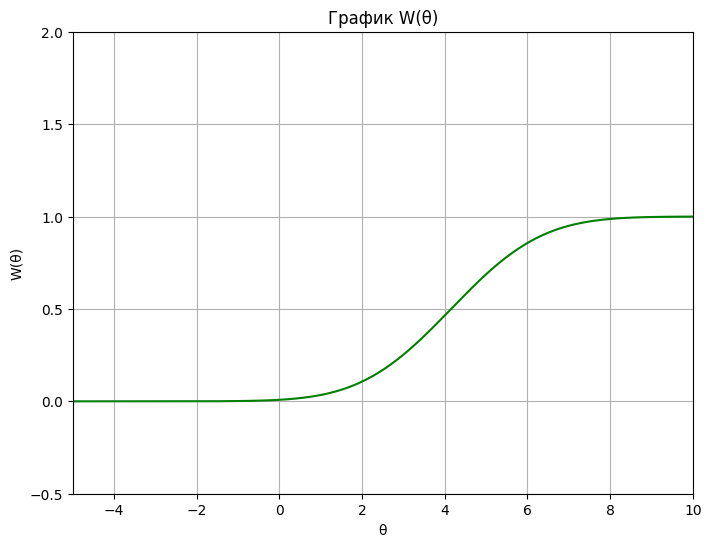

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

s = np.sqrt(3)

def F_theta(theta):
  return 1 - norm.cdf(upper_bound, loc=theta, scale=s)

theta_values = np.linspace(-5, 10, 200)

F_values = [F_theta(theta) for theta in theta_values]

plt.figure(figsize=(8, 6))
plt.plot(theta_values, F_values, color='g')
plt.xlabel("θ")
plt.ylabel("W(θ)")
plt.title("График W(θ)") 
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-0.5, 2)
plt.show()